In [21]:
import urllib3
import urllib.request
import pandas as pd
import numpy as np

In [24]:
data = urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00428/Immunotherapy.xlsx')

In [25]:
data2=data.read()

In [30]:
df = pd.read_excel(data2)

In [54]:
df

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1
...,...,...,...,...,...,...,...,...
85,1,40,5.50,8,3,69,5,1
86,1,38,7.50,8,2,56,45,1
87,1,46,11.50,4,1,91,25,0
88,1,32,12.00,9,1,43,50,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 90 non-null     int64  
 6   induration_diameter  90 non-null     int64  
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 5.8 KB


In [45]:
# Variabel independen
# Result_of_Treatment sebagai Y
x = df.drop(["Result_of_Treatment"], axis = 1)
x.head()

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter
0,1,22,2.25,14,3,51,50
1,1,15,3.00,2,3,900,70
2,1,16,10.50,2,1,100,25
3,1,27,4.50,9,3,80,30
4,1,20,8.00,6,1,45,8


In [37]:
# Variabel dependen
y = df["Result_of_Treatment"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Result_of_Treatment, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
scaler.fit(x_train)
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
error_rate = []
# Will take some time
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [49]:
y_pred = knn.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [50]:
knn.predict_proba(x_test)

array([[0.11111111, 0.88888889],
       [0.33333333, 0.66666667],
       [0.11111111, 0.88888889],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.22222222, 0.77777778],
       [0.        , 1.        ],
       [0.22222222, 0.77777778],
       [0.11111111, 0.88888889],
       [0.22222222, 0.77777778],
       [0.22222222, 0.77777778],
       [0.11111111, 0.88888889],
       [0.11111111, 0.88888889],
       [0.11111111, 0.88888889],
       [0.11111111, 0.88888889],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ]])

In [52]:
#Prediction and Evaluation
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[ 2  2]
 [ 4 10]]


              precision    recall  f1-score   support

           0       0.33      0.50      0.40         4
           1       0.83      0.71      0.77        14

    accuracy                           0.67        18
   macro avg       0.58      0.61      0.58        18
weighted avg       0.72      0.67      0.69        18



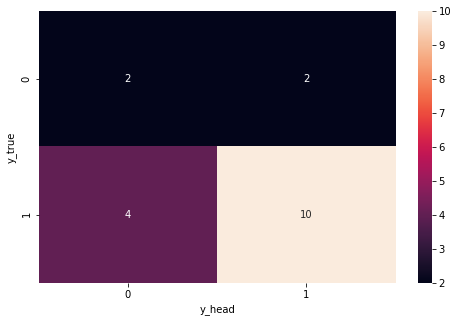

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt=".0f",
ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

Text(0, 0.5, 'Error Rate')

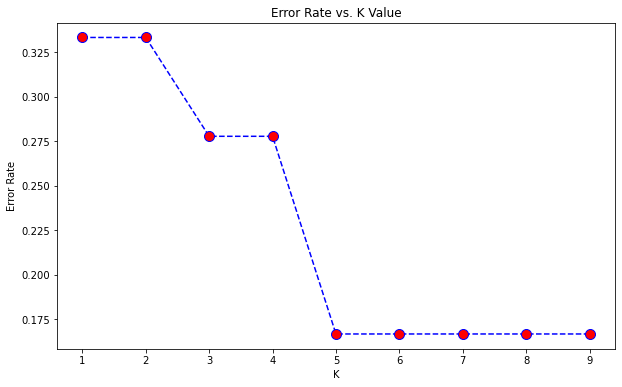

In [55]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')